In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *


In [2]:
#grid
sx = 1.5
sy = 1.5
sz = .15
x0 = 0
y0 = 0
z0 = -15
nx = 168
ny = 84
nz = 84
x1 = x0 + nx*sx
y1 = y0 + ny*sy
z1 = z0 + nz

dimensions = (nx, ny, nz)
spacing = (sx, sy, sz)
origin = (x0, y0, z0)  

# domain = np.ones([ny,nx],dtype=bool)
# domain[: 5]= 0
# plt.imshow(domain)

In [64]:
84/4

21.0

In [3]:
## create pile

P1 = Pile(name = "P1",seed=1)
PD = Pile(name = "PD",seed=1)

#units covmodel
covmodelD = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodelD1 = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[30,30]})])
covmodelC = gcm.CovModel2D(elem=[('cubic', {'w':0.2, 'r':[40,40]})])
covmodelB = gcm.CovModel2D(elem=[('cubic', {'w':0.6, 'r':[30,30]})])
covmodel_er = gcm.CovModel2D(elem=[('spherical', {'w':1, 'r':[50,50]})])

## facies covmodel
covmodel_SIS_C = gcm.CovModel3D(elem=[("exponential", {"w":.21,"r":[50, 50, 10]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B1 = gcm.CovModel3D(elem=[("exponential", {"w":.16,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B2 = gcm.CovModel3D(elem=[("exponential", {"w":.24,"r":[100, 100, 3]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B3 = gcm.CovModel3D(elem=[("exponential", {"w":.19,"r":[50, 50, 2]})], alpha=0, name="vario_SIS") # input variogram
covmodel_SIS_B4 = gcm.CovModel3D(elem=[("exponential", {"w":.13,"r":[100, 100, 4]})], alpha=0, name="vario_SIS") # input variogram

lst_covmodelC=[covmodel_SIS_C] # list of covmodels to pass at the function
lst_covmodelB=[covmodel_SIS_B1, covmodel_SIS_B2, covmodel_SIS_B3, covmodel_SIS_B4] # list of covmodels to pass


#create Lithologies 
# dic_s_D2 = {"int_method" : "grf_ineq","covmodel" : covmodelD1}
# dic_f_D2 = {"f_method":"homogenous"}
# D2 = Unit(name="D2",order=1,ID = 10,color="goldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D2),
#           dic_facies=dic_f_D2)
# dic_s_D1 = {"int_method" : "grf_ineq","covmodel" : covmodelD1, "mean":-6.5}
# dic_f_D1 = {"f_method":"homogenous"}
# D1 = Unit(name="D1",order=2,ID = 11,color="palegoldenrod",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D1)
#             ,dic_facies=dic_f_D1)


# PD.add_unit([D1,D2])

dic_s_D = {"int_method" : "grf_ineq","covmodel" : covmodelD}
dic_f_D = {"f_method":"homogenous"}
D = Unit(name="D",order=1,ID = 1,color="gold",contact="onlap",surface=Surface(contact="onlap",dic_surf=dic_s_D)
         ,dic_facies=dic_f_D)

dic_s_C = {"int_method" : "grf_ineq","covmodel" : covmodelC, "mean":-6.5}
dic_f_C = {"f_method" : "SIS","neig" : 10, "f_covmodel":lst_covmodelC, "probability":[0.3, 0.7]}
C = Unit(name="C", order=2, ID = 2, color="blue", contact="onlap", dic_facies=dic_f_C, surface=Surface(dic_surf=dic_s_C, contact="onlap"))

dic_s_B = {"int_method" : "grf_ineq","covmodel" : covmodelB, "mean":-8.5}
dic_f_B = {"f_method":"SIS", "neig" : 10, "f_covmodel":lst_covmodelB, "probability":[0.2, 0.4, 0.25, 0.15]}
B = Unit(name="B",order=3,ID = 3,color="purple",contact="onlap",dic_facies=dic_f_B,surface=Surface(contact="onlap",dic_surf=dic_s_B))

dic_s_A = {"int_method":"grf_ineq","covmodel": covmodelB, "mean":-11}
dic_f_A = {"f_method":"homogenous"}
A = Unit(name="A",order=5,ID = 5,color="red",contact="onlap",dic_facies=dic_f_A,surface=Surface(dic_surf = dic_s_A,contact="onlap"))

#Master pile
P1.add_unit([D,C,B,A])

Unit D: Surface added for interpolation
Unit C: Surface added for interpolation
Unit B: Surface added for interpolation
Unit A: Surface added for interpolation
Stratigraphic unit D added
Stratigraphic unit C added
Stratigraphic unit B added
Stratigraphic unit A added


In [4]:
# covmodels for the property model
covmodelK = gcm.CovModel3D(elem=[("exponential",{"w":0.3,"r":[30,30,10]})],alpha=-20,name="K_vario")
covmodelK2 = gcm.CovModel3D(elem=[("spherical",{"w":0.1,"r":[20,20, 5]})],alpha=0,name="K_vario_2")

facies_1 = Facies(ID = 1,name="Sand",color="yellow")
facies_2 = Facies(ID = 2,name="Gravel",color="lightgreen")
facies_3 = Facies(ID = 3,name="GM",color="blueviolet")
facies_4 = Facies(ID = 4,name="Clay",color="blue")
facies_5 = Facies(ID = 5,name="SM",color="brown")
facies_6 = Facies(ID = 6,name="Silt",color="goldenrod")
facies_7 = Facies(ID = 7,name="basement",color="red")

A.add_facies([facies_7])
B.add_facies([facies_1, facies_2, facies_3, facies_5])
D.add_facies([facies_1])
# D1.add_facies([facies_1])
# D2.add_facies([facies_5])
C.add_facies([facies_4, facies_6])

# property model
cm_prop1 = gcm.CovModel3D(elem = [("spherical", {"w":0.1, "r":[10,10,10]}),
                                  ("cubic", {"w":0.1, "r":[15,15,15]})])
cm_prop2 = gcm.CovModel3D(elem = [("cubic", {"w":0.2, "r":[25, 25, 5]})])

list_facies = [facies_1, facies_2, facies_3, facies_4, facies_5, facies_6, facies_7]
list_covmodels = [cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2, cm_prop1, cm_prop2]
means = [-4, -2, -6, -9, -6, -7, -19]
prop_model = ArchPy.base.Prop("K",
                              facies = list_facies,
                              covmodels = list_covmodels,
                                means = means,
                                int_method = "sgs",
                                vmin = -10,
                                vmax = -1
                                )



Facies basement added to unit A
Facies Sand added to unit B
Facies Gravel added to unit B
Facies GM added to unit B
Facies SM added to unit B
Facies Sand added to unit D
Facies Clay added to unit C
Facies Silt added to unit C


In [5]:
top = np.ones([ny,nx])*-6
bot = np.ones([ny,nx])*z0

In [6]:
T1 = Arch_table(name = "P1",seed=3)
T1.set_Pile_master(P1)
T1.add_grid(dimensions, spacing, origin, top=top,bot=bot)
T1.add_prop(prop_model)

Pile sets as Pile master
## Adding Grid ##
## Grid added and is now simulation grid ##
Property K added


In [7]:
T1.compute_surf(1)
T1.compute_facies(1)
T1.compute_prop(1)

Boreholes not processed, fully unconditional simulations will be tempted
########## PILE P1 ##########
Pile P1: ordering units
Stratigraphic units have been sorted according to order
Discrepency in the orders for units A and B
Changing orders for that they range from 1 to n

#### COMPUTING SURFACE OF UNIT A
A: time elapsed for computing surface 0.04369354248046875 s

#### COMPUTING SURFACE OF UNIT B
B: time elapsed for computing surface 0.03691530227661133 s

#### COMPUTING SURFACE OF UNIT C
C: time elapsed for computing surface 0.038684844970703125 s

#### COMPUTING SURFACE OF UNIT D
D: time elapsed for computing surface 0.0 s

Time elapsed for getting domains 0.12043094635009766 s
##########################


### 0.26227259635925293: Total time elapsed for computing surfaces ###

### Unit D: facies simulation with homogenous method ####
### Unit D - realization 0 ###
Time elapsed 0.01 s

### Unit C: facies simulation with SIS method ####
### Unit C - realization 0 ###
Only one facies

In [8]:
import flopy as fp

In [9]:
pv.set_jupyter_backend("client")

In [10]:
T1.plot_units(v_ex=3)

Widget(value='<iframe src="http://localhost:55384/index.html?ui=P_0x1e7e4269c90_0&reconnect=auto" class="pyvis…

In [11]:
T1.plot_facies(v_ex=3)

Widget(value='<iframe src="http://localhost:55384/index.html?ui=P_0x1e7e4cd5600_1&reconnect=auto" class="pyvis…

In [12]:
T1.plot_prop("K", v_ex=3)

Widget(value='<iframe src="http://localhost:55384/index.html?ui=P_0x1e7e422ae60_2&reconnect=auto" class="pyvis…

In [13]:
val = T1.get_prop("K")[0, 0, 0]
im = geone.img.Img(nx=nx, ny=ny, nz=nz, sx=sx, sy=sy, sz=sz, ox=x0, oy=y0, oz=z0, nv=1, val=val)

In [14]:
import ArchPy.ap_mf
from ArchPy.ap_mf import archpy2modflow, array2cellids

how to compare pathlines using different grid mode ?

- compute distance between the two pathlines (optimal transport, frechet distance)
- difference between time and distance traveled
- compare facies encountered (but how ?)
- compare units encountered

## Comparisons

In [15]:
np.random.seed(1)
# compare pathlines between the 3 modes

n_loc = 30
particles_loc_x = np.random.uniform(100, T1.get_xg()[-1], n_loc)
particles_loc_y = np.random.uniform(0, T1.get_yg()[-1], n_loc)
particles_loc_z = np.random.uniform(-12, -6, n_loc)
particles_loc = list(zip(particles_loc_x, particles_loc_y, particles_loc_z))
# particles_loc.append((170.7, 99.75, -9))
# n_loc += 1

In [16]:
def add_chd(archpy_flow, h1=100, h2=0):

    # add BC at left and right on all layers
    chd_data = []

    gwf = archpy_flow.get_gwf()
    
    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, 0] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h1))

    a = np.zeros((gwf.modelgrid.nlay, gwf.modelgrid.nrow, gwf.modelgrid.ncol), dtype=bool)
    a[:, :, -1] = 1
    lst_chd = array2cellids(a, gwf.dis.idomain.array)
    for cellid in lst_chd:
        chd_data.append((cellid, h2))

    chd = fp.mf6.ModflowGwfchd(gwf, stress_period_data=chd_data, save_flows=True)

In [17]:
iu = 0
ifa = 0
modflow_path = "../../../../../exe/mf6.exe"

# Archpy grid mode #
archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
archpy_flow.create_sim(grid_mode="archpy", iu=iu)
archpy_flow.set_k("K", iu, ifa, 0, log=True)

sim = archpy_flow.get_sim()

add_chd(archpy_flow, 100, 0)

sim.write_simulation()
sim.ims.complexity = "complex"
sim.ims.write()
sim.run_simulation()

# Particle Tracker mode #
archpy_flow.prt_create(workspace="workspace_prt", list_p_coords=particles_loc, trackdir="backward")
archpy_flow.prt_run()

l_df_pi_archpy = []
for i in range(n_loc):
    l_df_pi_archpy.append(archpy_flow.prt_get_facies_path_particle(i+1))

# Layer mode #
archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
archpy_flow.create_sim(grid_mode="layers", iu=iu)
archpy_flow.set_k("K", iu, ifa, 0, log=True)

sim = archpy_flow.get_sim()

add_chd(archpy_flow, 100, 0)

sim.write_simulation()
sim.ims.complexity = "moderate"
sim.ims.write()
sim.run_simulation()

archpy_flow.prt_create(workspace="workspace_prt", list_p_coords=particles_loc, trackdir="backward")
archpy_flow.prt_run()

l_df_pi_layer = []
for i in range(n_loc):
    l_df_pi_layer.append(archpy_flow.prt_get_facies_path_particle(i+1))

# New resolution mode #
archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
archpy_flow.create_sim(grid_mode="new_resolution", iu=iu, factor_x=4, factor_y=4, factor_z=4)
archpy_flow.set_k("K", iu, ifa, 0, log=True)

sim = archpy_flow.get_sim()

add_chd(archpy_flow, 100, 0)

sim.write_simulation()
sim.ims.complexity = "moderate"
sim.ims.write()
sim.run_simulation()

archpy_flow.prt_create(workspace="workspace_prt", list_p_coords=particles_loc, trackdir="backward")
archpy_flow.prt_run()

l_df_pi_new_res = []
for i in range(n_loc):
    l_df_pi_new_res.append(archpy_flow.prt_get_facies_path_particle(i+1))

Simulation created
To retrieve the simulation, use the get_sim() method
writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ims_-1...
  writing model test...
    writing model name file...
    writing package dis...
    writing package ic...
    writing package oc...
    writing package npf...
    writing package chd_0...
INFORMATION: maxbound in ('gwf6', 'chd', 'dimensions') changed to 9600 based on size of stress_period_data
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release

c:\Users\Ludovic\anaconda3\envs\hydro_env\lib\site-packages\flopy\utils\gridintersect.py:123: DeprecationWarning: Note `method="structured"` is deprecated. Pass `method="vertex"` to silence this warning. This will be the new default in a future release and this keyword argument will be removed.
  warnings.warn(


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ems...
  writing model test...
    writing model name file...
    writing package dis...
    writing package mip...
    writing package prp...
    writing package oc...
    writing package fmi...
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further

c:\Users\Ludovic\anaconda3\envs\hydro_env\lib\site-packages\flopy\utils\gridintersect.py:123: DeprecationWarning: Note `method="structured"` is deprecated. Pass `method="vertex"` to silence this warning. This will be the new default in a future release and this keyword argument will be removed.
  warnings.warn(


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ems...
  writing model test...
    writing model name file...
    writing package dis...
    writing package mip...
    writing package prp...
    writing package oc...
    writing package fmi...
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further

c:\Users\Ludovic\anaconda3\envs\hydro_env\lib\site-packages\flopy\utils\gridintersect.py:123: DeprecationWarning: Note `method="structured"` is deprecated. Pass `method="vertex"` to silence this warning. This will be the new default in a future release and this keyword argument will be removed.
  warnings.warn(


writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing solution package ems...
  writing model test...
    writing model name file...
    writing package dis...
    writing package mip...
    writing package prp...
    writing package oc...
    writing package fmi...
FloPy is using the following executable to run the model: ..\..\..\..\..\..\exe\mf6.exe
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                            VERSION 6.5.0 05/23/2024

   MODFLOW 6 compiled Jun 21 2024 02:57:23 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further

In [ ]:
# iu = 0
# ifa = 0

# # mpexe_path = "C:/Users/emmal/switchdrive2/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# mpexe_path = "E:/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# # mpexe_path = "C:/Users/Ludovic/switchdrive/Post_doc/prog/exe/modflow_exe/win64/mp7.exe"
# modflow_path = "../../../../exe/mf6.exe"

# # Archpy grid mode #
# archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
# archpy_flow.create_sim(grid_mode="archpy", iu=iu)
# archpy_flow.set_k("K", iu, ifa, 0, log=True)

# sim = archpy_flow.get_sim()

# add_chd(archpy_flow, 100, 0)

# sim.write_simulation()
# sim.ims.complexity = "complex"
# sim.ims.write()
# sim.run_simulation()

# archpy_flow.mp_create(mpexe=mpexe_path, 
#                       trackdir="backward", 
#                       list_p_coords=particles_loc)
# archpy_flow.mp_run(silent=False)

# l_df_pi = []
# for pi in range(n_loc):
#     df_pi = get_df_particle(archpy_flow, pi, fac_time=1/86400)
#     l_df_pi.append(df_pi)

# # Layers grid mode #
# archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
# archpy_flow.create_sim(grid_mode="layers", iu=iu)
# archpy_flow.set_k("K", iu, ifa, 0, log=True)

# sim = archpy_flow.get_sim()

# add_chd(archpy_flow, 100, 0)

# sim.write_simulation()
# sim.ims.complexity = "moderate"
# sim.ims.write()
# sim.run_simulation()

# archpy_flow.mp_create(mpexe=mpexe_path,
#                         trackdir="backward",
#                         list_p_coords=particles_loc)
# archpy_flow.mp_run(silent=False)

# l_df_pi_layers = []
# for pi in range(n_loc):
#     df_pi = get_df_particle(archpy_flow, pi, fac_time=1/86400)
#     l_df_pi_layers.append(df_pi)

# # New resolution grid mode #
# archpy_flow = archpy2modflow(T1, exe_name=modflow_path)
# archpy_flow.create_sim(grid_mode="new_resolution", iu=iu, factor_x=4, factor_y=2, factor_z=2)
# archpy_flow.set_k("K", iu, ifa, 0, log=True, k_average_method="new_resolution")

# sim = archpy_flow.get_sim()

# add_chd(archpy_flow, 100, 0)

# sim.write_simulation()
# sim.ims.complexity = "moderate"
# sim.ims.write()
# sim.run_simulation()

# archpy_flow.mp_create(mpexe=mpexe_path,
#                         trackdir="backward",
#                         list_p_coords=particles_loc)
# archpy_flow.mp_run(silent=False)

# l_df_pi_new_res = []
# for pi in range(n_loc):
#     df_pi = get_df_particle(archpy_flow, pi, fac_time=1/86400)
#     l_df_pi_new_res.append(df_pi)


In [18]:
from ArchPy.ap_mf import plot_particle_facies_sequence

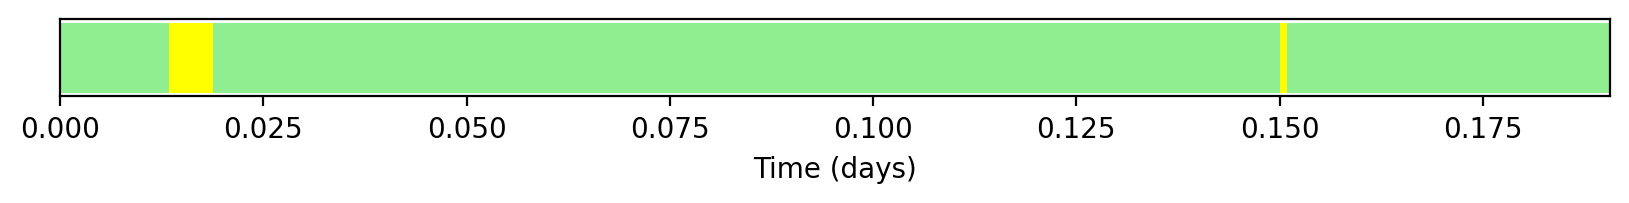

In [22]:

plot_particle_facies_sequence(archpy_flow.T1, l_df_pi_archpy[1], plot_time=True)

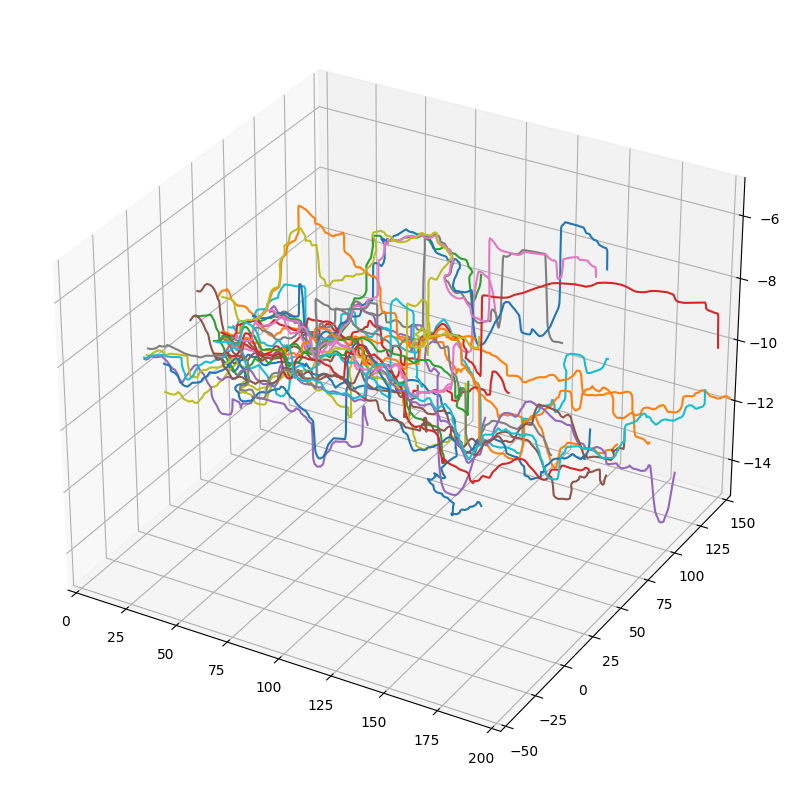

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

for df in l_df_pi_archpy:
    ax.plot(df["x"], df["y"], df["z"])
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

In [41]:
%matplotlib tk
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

i_particle = 5
for df in [l_df_pi_archpy[i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="k")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi_layer[i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="r")
    # ax.scatter(df["x"], df["y"], df["z"], c=df["time"], cmap="viridis")
    print(df["time"].max())
for df in [l_df_pi_new_res[i_particle]]:
    ax.plot(df["x"], df["y"], df["z"], color="b")
    # ax.scatter(df["x"], df["y"], df["z"], c=np.log10(df["time"]), cmap="viridis")
    print(df["time"].max())
    
plt.xlim(0, 200)
plt.ylim(0, 100)
ax.set_zlim(-15, -5)
ax.set_aspect("equalxy")
plt.show()

38.35643651922769
70.72414601431844
23.058558544856005


In [44]:
path1 = l_df_pi_archpy[5][["x", "y", "z", "time"]]
# indicate that time column is in days and set as index
# path1.loc[:, "time"] = pd.to_timedelta(path1["time"], unit="d")

path2 = l_df_pi_layer[5][["x", "y", "z", "time"]]
# indicate that time column is in days and set as index
# path2.loc[:, "time"] = pd.to_timedelta(path2["time"], unit="d")

# from dtaidistance import dtw_ndim
# d = dtw_ndim.distance(path1.values, path2.values)

# DTW(path1.values, path2.values)

# merge the two dataframes on time
df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="bfill").set_index("time")
path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="ffill")
path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="ffill")
path1

,x_1,y_1,z_1
time,,,
7.824346,112.905634,37.875040,-9.385266
13.533104,112.854515,37.903535,-9.525014
16.688800,112.854515,37.903535,-9.525014
21.902481,112.735819,38.129265,-9.675014
22.441926,112.573236,38.349913,-9.761978
...,...,...,...
70.713137,1.500000,42.966641,-8.583722
70.715771,1.500000,42.966641,-8.583722
70.721166,1.500000,42.966641,-8.583722


In [45]:
from scipy.spatial import distance

def DTW(path1, path2):
    """
    Compute the Frechet distance between two pathlines
    """
    
    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = dist[i, j]
            elif j == 0:
                MF[i, j] = dist[i, j]
            else:
                MF[i, j] = dist[i, j] + min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1])

    return MF[-1, -1]

def frechet_distance(path1, path2):

    # compute the distance between each point of the two pathlines
    dist = distance.cdist(path1, path2)

    # compute frechet matrix
    MF = np.zeros(dist.shape)
    for i in range(dist.shape[0]):
        for j in range(dist.shape[1]):
            if i == 0 and j == 0:
                MF[i, j] = dist[i, j]
            elif i == 0:
                MF[i, j] = max(MF[i, j-1], dist[i, j])
            elif j == 0:
                MF[i, j] = max(MF[i-1, j], dist[i, j])
            else:
                MF[i, j] = max(min(MF[i-1, j], MF[i, j-1], MF[i-1, j-1]), dist[i, j])
    
    return MF[-1, -1]

def hausdorff_distance(path1, path2):
    """
    Compute the Hausdorff distance between two pathlines
    """
    
    from scipy.spatial.distance import directed_hausdorff

    d1 = directed_hausdorff(path1, path2)
    return d1[0]

In [46]:
from dtaidistance import dtw_ndim
d = dtw_ndim.distance(path1.values, path2.values)
d

68.93909565773286

In [47]:
frechet_distance(path1.values, path2.values)

7.232638957219221

In [48]:
hausdorff_distance(path1.values, path2.values)

7.225489774591333

In [33]:
%matplotlib inline

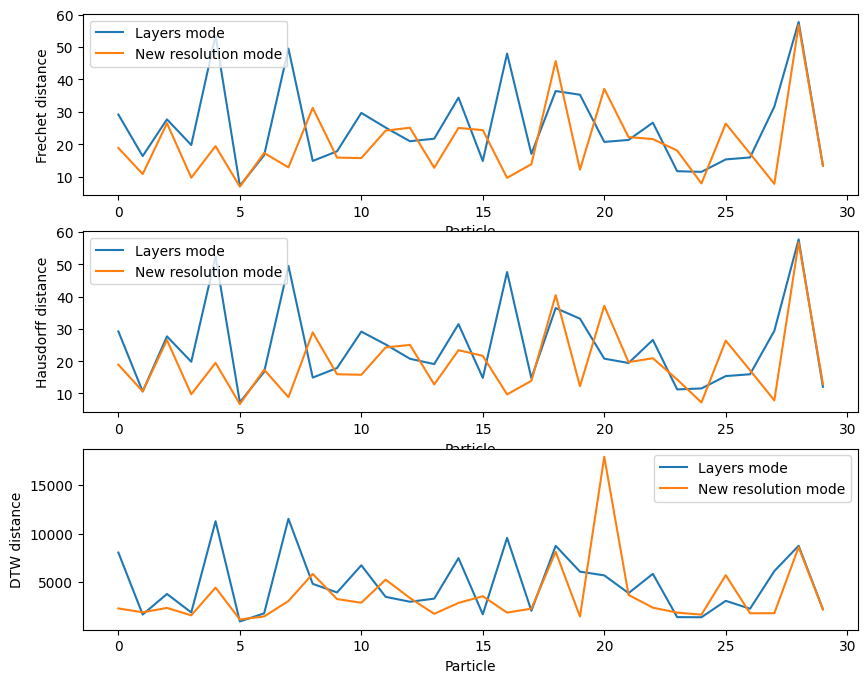

Frechet distance
Layers mode:  25.41286455685271
New resolution mode:  20.22925808665893
Hausdorff distance
Layers mode:  24.59047747065991
New resolution mode:  19.394755491497246
DTW distance
Layers mode:  4735.723616500111
New resolution mode:  3598.221539917638


In [35]:
# write a function to compute the frechet distance between two pathlines

l_layer_frechet = []
l_new_res_frechet = []
l_layer_hausdorff = []
l_new_res_hausdorff = []
l_layer_dtw = []
l_new_res_dtw = []
for i_particle in range(n_loc):
    if i_particle in []:
        # l_layer_frechet.append(np.nan)
        # l_layer_hausdorff.append(np.nan)
        # l_new_res_frechet.append(np.nan)
        # l_new_res_hausdorff.append(np.nan)
        # l_layer_dtw.append(np.nan)
        # l_new_res_dtw.append(np.nan)
        pass
    else:
        # compute frechet and hausdorffdistance
        path1 = l_df_pi_archpy[i_particle][["x", "y", "z"]].values
        path2 = l_df_pi_layer[i_particle][["x", "y", "z"]].values
        l_layer_frechet.append(frechet_distance(path1, path2))
        l_layer_hausdorff.append(hausdorff_distance(path1, path2))

        path2 = l_df_pi_new_res[i_particle][["x", "y", "z"]].values
        l_new_res_frechet.append(frechet_distance(path1, path2))
        l_new_res_hausdorff.append(hausdorff_distance(path1, path2))
        
        # # DTW
        path1 = l_df_pi_archpy[i_particle][["x", "y", "z", "time"]]
        # path1.loc[:, "time"] = pd.to_timedelta(path1["time"], unit="d")

        path2 = l_df_pi_layer[i_particle][["x", "y", "z", "time"]]
        # path2.loc[:, "time"] = pd.to_timedelta(path2["time"], unit="d")

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
        path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")

        l_layer_dtw.append(DTW(path1.values, path2.values))

        path1 = l_df_pi_archpy[i_particle][["x", "y", "z", "time"]]
        # path1.loc[:, "time"] = pd.to_timedelta(path1["time"], unit="d")

        path2 = l_df_pi_new_res[i_particle][["x", "y", "z", "time"]]
        # path2.loc[:, "time"] = pd.to_timedelta(path2["time"], unit="d")

        # # merge the two dataframes on time
        df_merge = pd.merge(path1, path2, on="time", suffixes=("_1", "_2"), how="outer").fillna(method="ffill").set_index("time")
        path1 = df_merge[["x_1", "y_1", "z_1"]].fillna(method="bfill")
        path2 = df_merge[["x_2", "y_2", "z_2"]].fillna(method="bfill")
        l_new_res_dtw.append(DTW(path1.values, path2.values))


fig, ax = plt.subplots(3, 1, figsize=(10, 8))
ax[0].plot(l_layer_frechet, label="Layers mode")
ax[0].plot(l_new_res_frechet, label="New resolution mode")
ax[0].set_xlabel("Particle")
ax[0].set_ylabel("Frechet distance")
ax[0].legend()

ax[1].plot(l_layer_hausdorff, label="Layers mode")
ax[1].plot(l_new_res_hausdorff, label="New resolution mode")
ax[1].set_xlabel("Particle")
ax[1].set_ylabel("Hausdorff distance")
ax[1].legend()

ax[2].plot(l_layer_dtw, label="Layers mode")
ax[2].plot(l_new_res_dtw, label="New resolution mode")
ax[2].set_xlabel("Particle")
ax[2].set_ylabel("DTW distance")
ax[2].legend()

plt.show()

print("Frechet distance")
print("Layers mode: ", np.mean(l_layer_frechet))
print("New resolution mode: ", np.mean(l_new_res_frechet))
print("Hausdorff distance")
print("Layers mode: ", np.mean(l_layer_hausdorff))
print("New resolution mode: ", np.mean(l_new_res_hausdorff))
print("DTW distance")
print("Layers mode: ", np.mean(l_layer_dtw))
print("New resolution mode: ", np.mean(l_new_res_dtw))

In [54]:
np.argmin(l_new_res_dtw)

5

In [ ]:
sum(np.array(l_new_res_frechet) < np.array(l_layer_frechet)) / len(l_new_res_frechet)

In [193]:
# retrieve lithologies along the pathlines
facies_domains = T1.get_facies(0, 0, all_data = False)
facies_along_path = facies_domains[unique_cells_ordered[:, 0], unique_cells_ordered[:, 1], unique_cells_ordered[:, 2]][::-1]

In [ ]:
%matplotlib inline
# plot cumulative distribution of the facies along the pathlines vs the time
fig, ax = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.4)

curves = []

list_facies = [fa for fa in T1.get_all_facies()]
# orders facies by proportions
list_facies = sorted(list_facies, key=lambda x: -np.sum(facies_along_path == x.ID))
for fa in list_facies:
    curves.append(np.cumsum(facies_along_path == fa.ID) / len(facies_along_path))

prev_curve = np.zeros_like(curves[0], dtype=float)
for i, fa in enumerate(list_facies):
    curve = curves[i].astype(float) 
    curve[curve == 0] = np.nan
    ax[0].fill_between(-time_ordered, curve+prev_curve, prev_curve, alpha=0.5, color=fa.c)
    # ax[0].plot(-time_ordered, curve+prev_curve, label=fa.name, color=fa.c, marker="o", linewidth=0)
    prev_curve[~np.isnan(curve)] = curve[~np.isnan(curve)] + prev_curve[~np.isnan(curve)]

ax[0].set_xlabel("Time (s)", fontsize=12)
ax[0].set_ylabel("Cumulative proportion of facies", fontsize=12)
ax[0].set_title("cdf of facies along the pathlines")
# print time spent in each facies 

df_time = pd.DataFrame(columns=[fa.name for fa in list_facies])
# initialize the time spent in each facies
time_spent = np.zeros(len(list_facies))
for i, fa in enumerate(list_facies):
    time_spent[i] = np.sum(facies_along_path == fa.ID)
df_time.loc[0] = time_spent

for i in range(len(time_ordered)-1):
    dt = time_ordered[i] - time_ordered[i+1]
    for j, fa in enumerate(list_facies):
        if facies_along_path[i] == fa.ID:
            time_spent[j] += dt

df_time /= 86400  # convert seconds to days

color_facies = [fa.c for fa in list_facies]

df_time.plot(kind="bar", color=color_facies, legend=False, logy=False, ax=ax[1])
ax[1].set_title("Time spent in each facies (days)")
ax[1].set_ylabel("Time spent (days)", fontsize=12)
plt.grid()
plt.show()